# Scikit-learn

La página oficial de Scikit-learn es [aquí](https://scikit-learn.org/stable/index.html).


## ¿Cómo instalar biblioteca en Python?

En la consola _Qt Console_, se escribe el comando:

pip install _nombre_de_libreria_


### Ejemplo: Regresión Lineal Simple

Ahora veamos un ejemplo, siguiendo los pasos para hacer un ajuste.

In [1]:
# Se cargan las librerías que se van a utilizar
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
## 1) EXTRAER DATOS
# Los datos pueden encontrarse en diferentes formatos, en nuestro caso están en formato csv.

# Se carga la base de datos y se definen las varibles X y Y
datos = pd.read_csv('Salary_Data.csv') #Se encuentra en la misma carpeta que el jupyter notebook

X = datos.iloc[:, :-1].values #Años de experiencia
Y = datos.iloc[:, 1].values #Salario

print("type(datos): ",type(datos))
print("type(X)",type(X))
print("type(Y)",type(Y))

type(datos):  <class 'pandas.core.frame.DataFrame'>
type(X) <class 'numpy.ndarray'>
type(Y) <class 'numpy.ndarray'>


In [3]:
## 2) ANÁLISIS EXPLORATORIO
# Se realiza una descripción analítica de los datos.

# Se muestran los primeros 5 datos del data frame
datos.head()
#Los datos corresponden al salario de 30 personas y el número de años de experiencia que tienen.

##Información del data frame
#datos.info
#print(datos)
#print(X)
#print(Y)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Se cuenta el número de NaN's por columna
datos.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# Cuenta los valores repetidos de la columna 1 (años de experiencia)
datos["YearsExperience"].value_counts().head()

4.0    2
3.2    2
9.6    1
6.8    1
2.0    1
Name: YearsExperience, dtype: int64

In [6]:
# Cuenta los valores repetidos de la columna 2 (salario)
datos["Salary"].value_counts().head()

109431.0    1
37731.0     1
56957.0     1
57081.0     1
63218.0     1
Name: Salary, dtype: int64

In [7]:
# Dimensiones del data frame
datos.shape #Se tienen 30 renglones (personas) y 2 columnas (Años de experiencia y Salario)

(30, 2)

In [8]:
# Se cambian los NA's por el promedio de la columna
#Nota: En este caso no hay NA's
datos["YearsExperience"] = datos["YearsExperience"].fillna(datos["YearsExperience"].mean())
datos["YearsExperience"].head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

C:\Users\miri_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

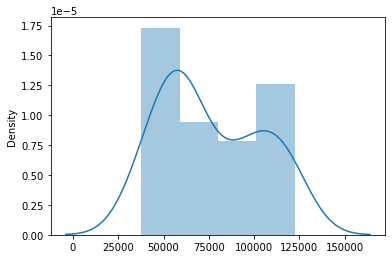

In [9]:
## 3) VISUALIZACIÓN DE LOS DATOS
# Para entender mejor los datos es necesario graficarlos.

sns.distplot(Y)#Salario

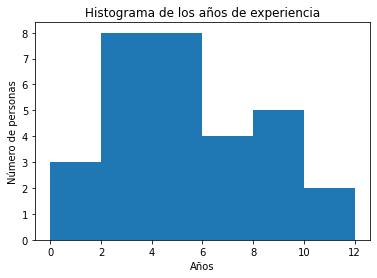

In [11]:
plt.hist(X, bins=[0,2,4,6,8,10,12]) #Se hace la división por cada 2 años
plt.title('Histograma de los años de experiencia')
plt.xlabel('Años')
plt.ylabel('Número de personas')
plt.show()

37731.0
122391.0


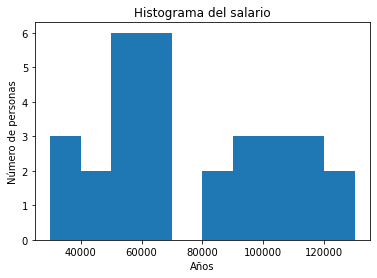

In [10]:
print(min(Y)) #37731.0
print(max(Y)) #122391.0

plt.hist(Y, bins=[30000,40000,50000,60000,70000,
                  80000,90000,100000,110000,120000,
                 130000]) #Cada 10 mil a partir de 30 mil.
plt.title('Histograma del salario')
plt.xlabel('Años')
plt.ylabel('Número de personas')
plt.show()

<AxesSubplot:xlabel='YearsExperience'>

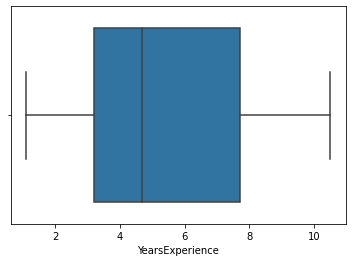

In [13]:
sns.boxplot(x="YearsExperience", data=datos)

In [14]:
round(np.mean(X),2) #Promedio de años de experiencia

5.31

<AxesSubplot:xlabel='Salary'>

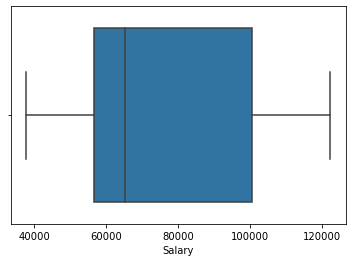

In [15]:
sns.boxplot(x="Salary", data=datos)

In [16]:
round(np.mean(Y),2) #Promedio de salario

76003.0

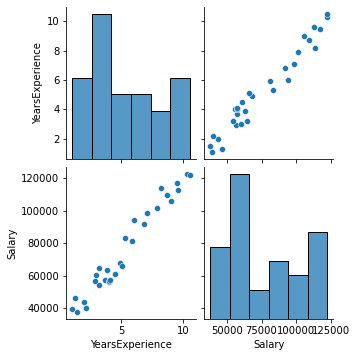

In [17]:
#Se muestra la correlación entre las variables
sns.pairplot(datos)

In [12]:
## 4) DIVIDIR LOS DATOS
# Se separan los datos en 2 grupos (usualmente 80% y 20%):
# i) Para entrenar al modelo (80%)
# ii) Para probar el modelo (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, #Se indican los vectores que se van a dividir
                                                    test_size = 0.2, #Se indica el porcentajede los datos para probar el modelo
                                                    random_state = 0) #Se fija la semilla

# Nota: Tomar la muestra aleatoria es muy importante porque en caso de que los datos estén
#ordenados el algoritmo no aprende adecuadamente. Por ejemplo si tenemos 80 sanos y 20 enfermos,
#sólo se tomarían los 80 sanos (por ser los primeros 80).

print("El vector X_train tiene ",len(X_train), " elementos.")
print("El vector Y_train tiene ",len(Y_train), " elementos.")
print("El vector X_test tiene ",len(X_test), " elementos.")
print("El vector Y_test tiene ",len(Y_test), " elementos.")

El vector X_train tiene  24  elementos.
El vector Y_train tiene  24  elementos.
El vector X_test tiene  6  elementos.
El vector Y_test tiene  6  elementos.


In [13]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir un modelo de regresión lineal simple para "X_train"
regresor = LinearRegression()
regresor.fit(X_train, Y_train)

LinearRegression()

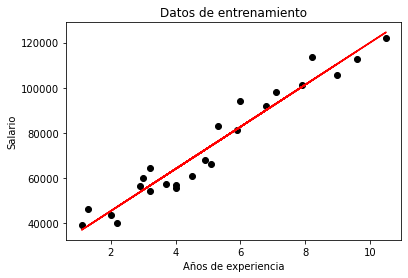

In [14]:
# Se grafican los vectores de entrenamiento.
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X_train, regresor.predict(X_train), color = 'red')
plt.title('Datos de entrenamiento')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

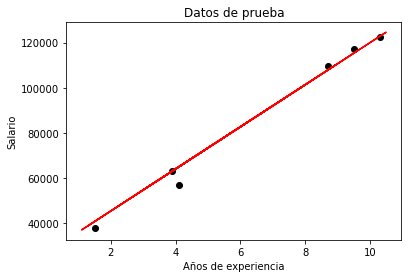

In [15]:
# Se grafican los vectores de prueba.
plt.scatter(X_test, Y_test, color = 'black') #Puntos utilizados para la prueba del modelo
plt.plot(X_train, regresor.predict(X_train), color = 'red') #Recta correspondiente a los datos de entrenamiento
plt.title('Datos de prueba')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

In [16]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = regresor.predict(X_test)
#print(Y_pred)
print("El vector Y_pred tiene ",len(Y_pred), " elementos.")

El vector Y_pred tiene  6  elementos.


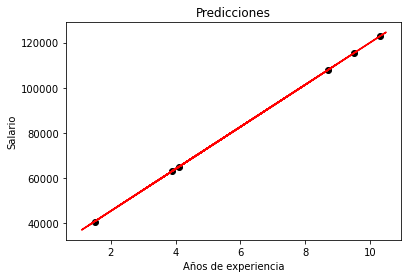

In [17]:
# Se grafican los resultados de la predicción.
plt.scatter(X_test, Y_pred, color = 'black')
plt.plot(X_train, regresor.predict(X_train), color = 'red') #Recta correspondiente a los datos de entrenamiento
plt.title('Predicciones')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

#### 7) EVALUACIÓN DEL MODELO
Veamos cómo se comporta el modelo:

7.1 Calcular $R^{2}$

7.2 Calcular los errores absolutos $(real - estimado)$ y graficarlos

7.3 Calcular los errores relativos $\left( \dfrac{\text{real - estimado}}{\text{real}} \right)$ y graficarlos

7.4 Graficar valores estimados vs valores reales

7.5 Calcular el error cuadrático: $(real − estimado)^{2}$

7.6 Calcular el error cuadrático medio: $\dfrac{\displaystyle \sum_{i = 1}^{n} (real_{i} − estimado_{i})^{2}}{n}$


In [24]:
#7.1 Calcular R^2
r_cuadrada = r2_score(Y_test,Y_pred)
round(r_cuadrada,3) #Porcentaje de los datos explicados por el modelo

0.988

[-3017.96  -308.62 -7880.66   118.86  1719.44  1631.5 ]


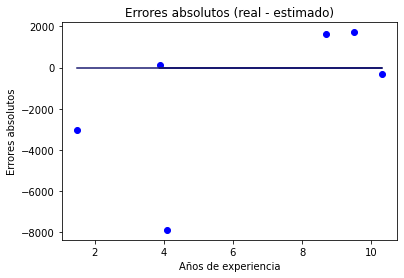

In [56]:
#7.2 Calcular los errores absolutos (real - estimado) y graficarlos
err_abs = Y_test-Y_pred

print(np.around(err_abs,2))
plt.scatter(X_test, err_abs, color = 'blue')
plt.plot(X_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('Años de experiencia')
plt.ylabel('Errores absolutos')
plt.show()

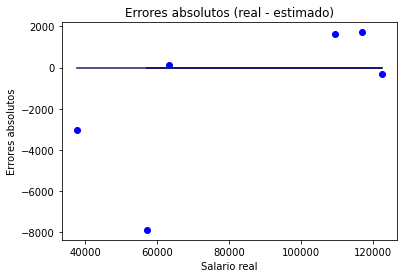

In [63]:
#Graficamos contra el salario real
plt.scatter(Y_test, err_abs, color = 'blue')
plt.plot(Y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('Salario real')
plt.ylabel('Errores absolutos')
plt.show()

#Notamos que obtenemos la misma gráfica que la anterior.

[-0.08  -0.003 -0.138  0.002  0.015  0.015]


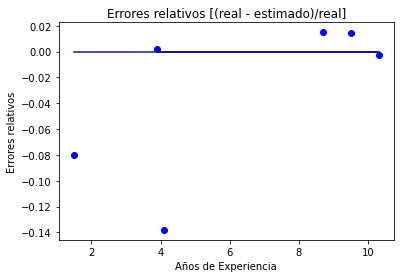

In [57]:
#7.3 Calcular los errores relativos [(real - estimado)/real] y graficarlos
err_rel = err_abs/Y_test

print(np.around(err_rel,3))
plt.scatter(X_test, err_rel, color = 'blue')
plt.plot(X_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Años de Experiencia')
plt.ylabel('Errores relativos')
plt.show()

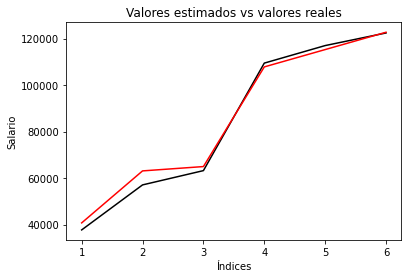

In [59]:
#7.4 Graficar valores estimados vs valores reales
X = range(1,len(Y_test)+1)
plt.plot(X, sorted(Y_test), color = 'black') #Recta de valores reales
plt.plot(X, sorted(Y_pred), color = 'red') #Recta de valores estimados
plt.title('Valores estimados vs valores reales')
plt.xlabel('Índices')
plt.ylabel('Salario')
plt.show()

#Nota: Tanto los valores reales como los estimados se ordenaron de menor a mayor.

In [29]:
#7.5 Calcular el error cuadrático = (real − estimado)^2
#print(np.around(err_abs,2))
err_cuad = pow(err_abs,2)
print(err_cuad)

[9.10809367e+06 9.52481289e+04 6.21047574e+07 1.41271897e+04
 2.95646410e+06 2.66178327e+06]


In [31]:
#7.6 Calcular el error cuadrático medio = (1/n) * \sum (real − estimado)^2
'''
Indica qué tan cerca está la línea de la regresión lineal de los valores estimados.
i) Se elevan al cuadrado los errores absolutos.
ii) Se suman.
iii) Se divide el resultado entre el número de datos estimados.
'''
err_cuad_medio = mean_squared_error(Y_test, Y_pred)
print(round(err_cuad_medio,2))
print(round(math.sqrt(err_cuad_medio),2))#Raíz cuadrada del error cuadrático medio

12823412.3
3580.98


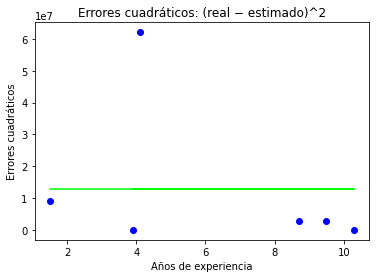

In [61]:
#Graficamos los errores cuadráticos
Y= np.repeat(err_cuad_medio, len(err_cuad))
plt.scatter(X_test, err_cuad, color = 'blue')#Se ordenan de menor a mayor
plt.plot(X_test,Y , color = 'lime') #Recta en Y = err_cuad_medio
plt.title('Errores cuadráticos: (real − estimado)^2')
plt.xlabel('Años de experiencia')
plt.ylabel('Errores cuadráticos')
plt.show()

## CONCLUSIONES:

    - El modelo explica el 98.8% de los datos.
    - Existe una correlación lineal entre los años de experiencia y el salario. Entre más años de experiencia, mayor es el salario.
    - Este resultado es útil para nuevas contrataciones.